In [5]:
import numpy as np
from  datascience import *
import matplotlib.pylab as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Repaso

# Variables categóricas

Una variable categórica es un tipo de variable que toma un conjunto limitado de valores posibles y cada uno de esos valores representa una categoría o un grupo. Estas variables no tienen un orden inherente, lo que significa que no se puede hacer una comparación natural entre sus valores (por ejemplo, no se puede decir que una categoría es "mayor" o "menor" que otra).

**Nominales:** Las categorías no tienen un orden específico. Ejemplos incluyen el color de un automóvil (rojo, azul, verde) o el tipo de comida (italiana, mexicana, china).

**Ordinales:** Las categorías tienen un orden lógico, pero la diferencia entre ellas no es medible o significativa. Ejemplo: nivel educativo (primaria, secundaria, universidad).


Ejemplo: 

    - Nominales:
    
        - Color de ojos 
        
        - Tipo de vehiculo
        
        - Estado civil 

    - Ordinales:
    
        - Talla de ropa: S, M, L XL
        
        - Grado escolar: primaria, secundaria, universitarios, posgrado
        


In [6]:
frutas = Table().with_columns("Fruta", ["Manzana", "Mangostino","Mandrono", "Uva", "Pera"], \
    "Color", ["Rojo", "Cafe Oscuro","Amarillo",  "Morado", "Verde"], \
    "Cantidad", make_array(10, 20, 10, 100,20)  )

In [7]:
frutas

Fruta,Color,Cantidad
Manzana,Rojo,10
Mangostino,Cafe Oscuro,20
Mandrono,Amarillo,10
Uva,Morado,100
Pera,Verde,20


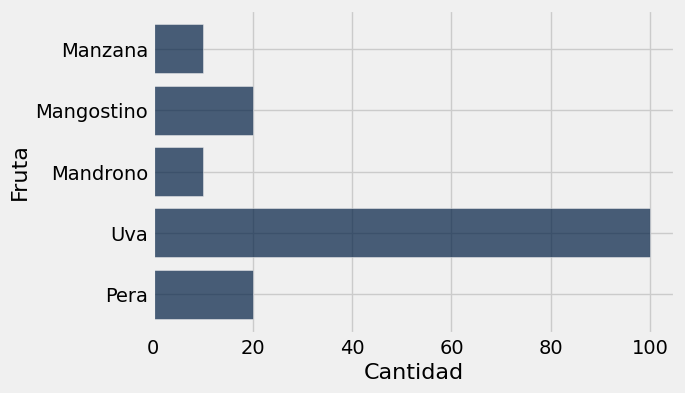

In [8]:
frutas.barh("Fruta", "Cantidad")

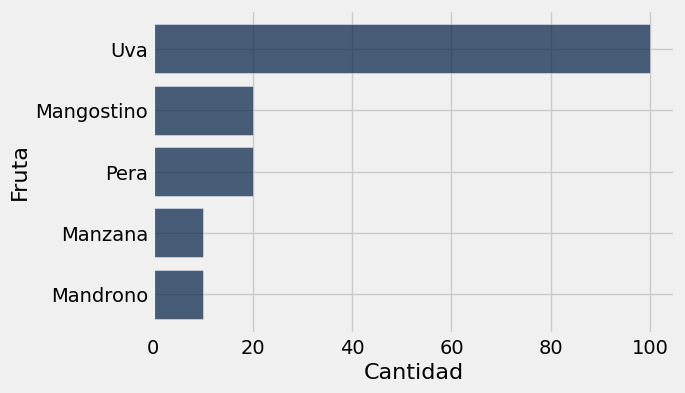

In [9]:
frutas.sort("Cantidad", descending = True).barh("Fruta", "Cantidad")

# Datos sobre cajas
Analicemos los siguientes datos, generados de forma sintentica. Los siguientes datos, son datos de alturas de personas, generados de  forma aleatoria

In [10]:
# Parámetros de la distribución
media = 1.70  # Media de la distribución
desviacion_estandar = 0.3  # Desviación estándar
n_datos = 60  # Número de datos a generar
rng = np.random.default_rng(seed=1)  # Establecer el random state
datos = np.round(rng.normal(loc=media, scale=desviacion_estandar, size=n_datos)*100)
alturas = Table().with_columns("altura", datos)
alturas

altura
180
195
180
131
197
183
154
187
181
179


In [11]:
89+(234-89)*2/10

118.0

In [12]:
np.min(alturas.column("altura"))

89.0

In [13]:
alturas.bin("altura", bins = 10)

bin,altura count
89,1
103.5,1
118,2
132.5,6
147,12
161.5,14
176,14
190.5,7
205,1
219.5,2


In [14]:
np.linspace(min(datos), max(datos), 11)

array([  89. ,  103.5,  118. ,  132.5,  147. ,  161.5,  176. ,  190.5,
        205. ,  219.5,  234. ])

In [15]:
alturas.bin("altura", bins = np.linspace(min(datos), max(datos), 11))

bin,altura count
89,1
103.5,1
118,2
132.5,6
147,12
161.5,14
176,14
190.5,7
205,1
219.5,2


La anterior tabla muestra el conteo de alturas, con los siguiente detalles 

- Entre [89, 103.5) hay 1 conteos

- Entre [103.5, 118) hay 2 conteos y asi sucecivamente
...



Podemos entonces definir el diagrama de cajas como aquel en el cual se realiza un conteo de los datos dentro de un conjunto de cajas con un ancho definido $\Delta$ .

$\Delta = \frac{D_{max} - D_{min}}{N_{bins}} $ 

En este caso, $D_{max}$, $D_{min}$ son los datos máximos y mínimos  del conjunto de datos (dataset)
$N_{bins}$ el número de bins a trabajar.

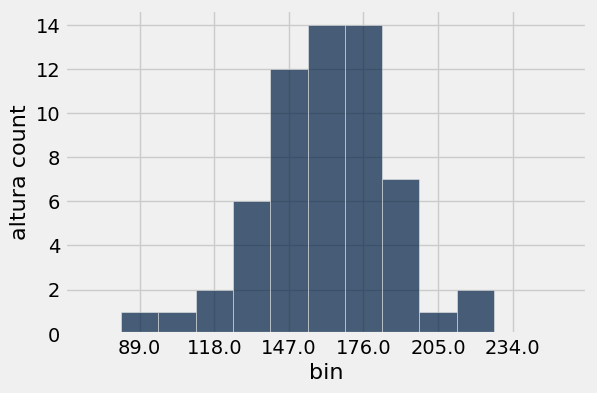

In [16]:
alturas.bin("altura", bins = np.linspace(min(datos), max(datos), 11)).bar("bin","altura count" )

# Histograma

Un histograma es una representación gráfica que muestra la distribución de un conjunto de datos numéricos. Se utiliza para visualizar cómo se distribuyen los valores de una variable en diferentes rangos (llamados bins o intervalos). A diferencia de un gráfico de barras tradicional, donde las barras representan categorías, en un histograma las barras representan densidades de datos que caen dentro de cada bin.

## Características clave de un histograma:

- **Eje horizontal (x):** Representa los intervalos o bins, que agrupan los datos en rangos. Cada bin cubre un rango específico de valores numéricos.

- **Eje vertical (y):** Representa la densidad de los datos caen dentro de cada bin.

Barras: La altura de cada barra refleja la cantidad de observaciones que caen dentro del bin correspondiente.

In [17]:
bins = np.linspace(min(datos), max(datos), 11)
bins

array([  89. ,  103.5,  118. ,  132.5,  147. ,  161.5,  176. ,  190.5,
        205. ,  219.5,  234. ])

(0.0, 0.018)

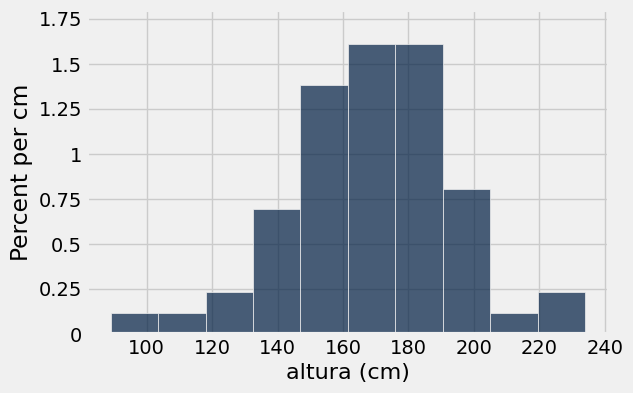

In [18]:
alturas.hist("altura", bins=bins, unit="cm")
plt.ylim(0.0, 0.018)

In [19]:
#alturas.bin("altura", bins = np.linspace(min(datos), max(datos), 11))
14/60*100

23.333333333333332

Entendamos este gráfico:

Tomemos el bins comprendido entre 176 y 190.5. La separación entre datos es de 14.5, además de los datos anteriores, sabemos que hay 14 datos en ese bins y en total hay 60 datos,  entonces:

El porcentaje de altura en ese bins es: 

$\mathrm{PorcentajeAlturas} = (14/60)*100 = 23.3 \% $


Luego: 

$ \frac{\mathrm{PorcentajeAlturas}}{\mathrm{Delta Altura}} = \frac{23.3}{14} = 1.67 $

En otras palabras el área de la barra representa $A = 1.67 \times 14 = 23.3 \% $,  porcentaje de datos sobre 60  que están en esa caja. 


# Principio del área.

El principio del área es una regla fundamental en la visualización de datos que establece que el tamaño de los elementos visuales en un gráfico debe ser proporcional a la cantidad de datos que representan. En otras palabras, el área de cualquier elemento gráfico, como barras, puntos o segmentos, debe reflejar con precisión el valor o la frecuencia de los datos que está representando.

## Aplicación en gráficos:

En un histograma, el área de cada barra es proporcional a la frecuencia o cantidad de datos en ese intervalo (bin).
En un gráfico de barras, la longitud de cada barra es proporcional al valor de la variable que representa.
En gráficos más complejos, como los diagramas de sectores o gráficos de burbujas, el área de los sectores o burbujas debe ser proporcional a los valores de los datos.


Los [histogramas]("https://inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html") siguen el principio del área y tienen dos propiedades:

- Las cajas se dibujan a escala y son contiguos (aunque algunos podrían estar vacíos), porque los valores en el eje horizontal son numéricos y, por lo tanto, tienen posiciones fijas en la línea numérica.

- El área de cada barra es proporcional al número de entradas en el contenedor.


`Area de la barra = Porcentaje de datos en el bin`

`Altura de la barra =  Area de la barra/Ancho del bin`

Las unidades del eje dependiente son : porcentaje por undidad en el eje horizontal, análogo a una densidad


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Ahora leeamos los datos de estudiante y construyamos un gráfico de cajas ....(dem de clase)

Para analizar los datos sobre cajas miraremos la altura de diferentes estudiantes, para ello por favor ingresar su altura aproximada, en m en 
el siguiente [google form](https://forms.gle/9iB32Ro3vH3bHC8R8)


In [20]:
# Ejercicios
# Construir un histograma para los datos de altura construidos desde el formulario ...

# Con base al histograma cual es el porcentaje de estudiantes que tiene una altura máxima

# Funciones

In [166]:
def nombre_funcion(a, b):
    """
    Esto realiza la suma de enteros
    """
    return a + b

In [167]:
nombre_funcion("hola", " mundo")

'hola mundo'

In [168]:
nombre_funcion("Clase de", " Fundamentos de computación")

'Clase de Fundamentos de computación'

In [169]:
def suma_de_valores(a, b):
    return a+b

In [170]:
suma_de_valores(10, 10)

20

In [171]:
def es_par(n):
    return n%2==0

In [172]:
es_par(3)

False

In [173]:
def contar_vocales(palabra):
    ...
    ...
    Crear una funcion que permita contar vocales dentro de un texto


SyntaxError: invalid syntax (1185261076.py, line 4)

# Función apply 

In [1]:
edades = Table().with_columns(
    'Pesona', make_array('A', 'B', 'C', 'D', 'E', 'F'),
    'Edad', make_array(17, 117, 52, 100, 6, 101)
)
edades

NameError: name 'Table' is not defined

In [2]:
def minimo_(x):
    return min(x, 40)

In [191]:
edades.apply(minimo_, "Edad")

array([17, 40, 40, 40,  6, 40])

In [192]:
edades = Table().with_columns(
    'Pesona', make_array('A', 'B', 'C', 'D', 'E', 'F'),
    'Edad', make_array(17, 117, 52, 100, 6, 101)
)
edades

Pesona,Edad
A,17
B,117
C,52
D,100
E,6
F,101


In [194]:
type(minimo_)

function

In [235]:
# Crear la tabla
celulas = Table().with_columns(
    'Tiempo', ['0s', '1s', '2s', '3s', '4s'],
    'Concentracion_Celulas', ['1.0 %', ' 1.8%', ' 3.0%', '5.5 %', '10.0%' ]
)

In [236]:
celulas

Tiempo,Concentracion_Celulas
0s,1.0 %
1s,1.8%
2s,3.0%
3s,5.5 %
4s,10.0%


In [237]:
...

Ellipsis

In [238]:
...

Ellipsis

In [239]:
...

Ellipsis

In [240]:
....

SyntaxError: invalid syntax (1805539695.py, line 1)